In [5]:
#Training and testing a model
import pandas as pd
import pylab as plt
import numpy as np
import pandas.plotting as rplot
from matplotlib.ticker import NullFormatter
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model,feature_selection,preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error

In [7]:
b_data = pd.read_csv('basketball.csv')
X = b_data.values.copy()
X_train, X_valid, y_train, y_valid = train_test_split(X[:,:-1], X[:,:-1], train_size=0.80)

#Ordinary Least Square
result = sm.OLS(y_train, add_constant(X_train)).fit()


In [11]:
result_alternate = sm.OLS(y_train, add_constant(X_train[:,2])).fit()
result_alternate.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7fd0c02ebb20>>

In [14]:
ypred = result.predict(add_constant(X_valid))
print(mse(ypred, y_valid))

[2.98765836e-24 8.88572924e-27 6.78264427e-27 1.10146066e-25]


In [19]:
ypred_alternate = result_alternate.predict(add_constant(X_valid[:,2]))
print(mse(ypred_alternate , y_valid))

[1.79532893e-01 1.52008000e+03 1.23259516e-32 6.50071566e-03]


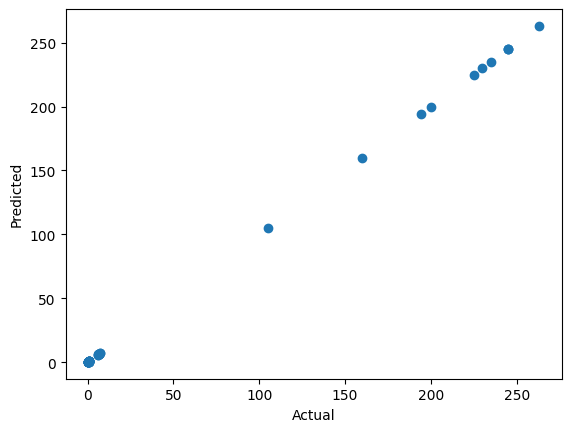

In [21]:
fig, ax = plt.subplots(1, 1)
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()


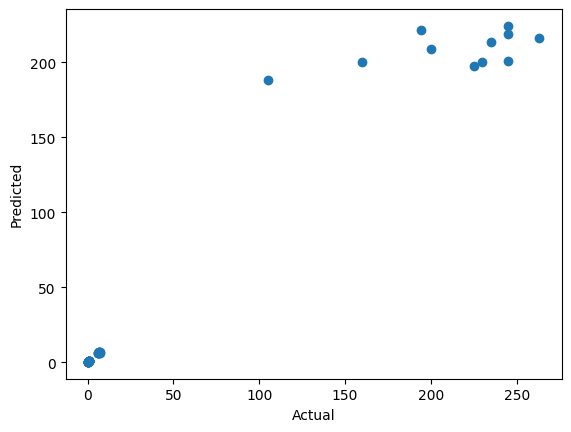

In [22]:
#Now, let's plot the scatter for the alternate model:
fig, ax = plt.subplots(1,1)
ax.scatter(y_valid, ypred_alternate)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [23]:
# Create linear regression object
lm = linear_model.LinearRegression()

In [24]:
# Train the model using the training sets
lm.fit(X_train, y_train)


LinearRegression()

In [27]:
print('Intercept is %f', (lm.intercept_))

Intercept is %f [ 1.34203759e-12 -1.13686838e-13  4.01900735e-14 -2.24265051e-14]


In [28]:
pd.DataFrame(zip(b_data.columns, lm.coef_), columns = ['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,height,"[1.0000000000000002, -6.429942492785427e-15, -..."
1,weight,"[-2.487877373304785e-14, 1.0000000000000013, -..."
2,success_field_goals,"[-3.136821454098528e-17, -1.9103642279194588e-..."
3,success_free_throws,"[5.2368978942863204e-17, 1.0484235007934828e-1..."


In [33]:
train_test_split(lm, X_train, y_train, scoring='r2')

TypeError: train_test_split() got an unexpected keyword argument 'scoring'

In [34]:
#Let's see how the mean squared error is calculated:
ypred = lm.predict(X_valid)
mean_squared_error(ypred, y_valid)

2.096082808502845e-26

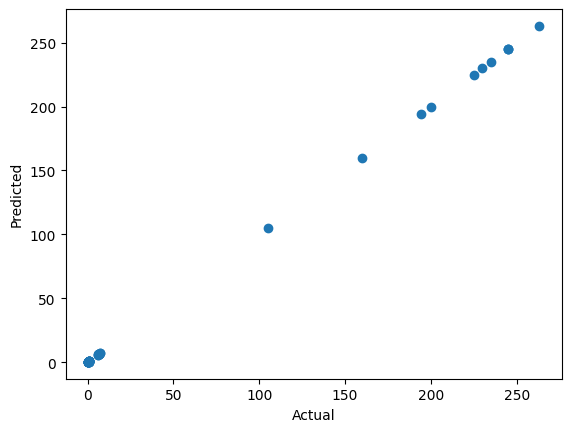

In [35]:
#Finally, the actual versus the predicted plot will be same as the first model plot
#of statsmodels:

fig, ax = plt.subplots(1,1)
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()